In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import rasterio as rs

In [2]:
def get_keys(df,idxraster=[]):
    '''
    Find index raster cell index values.
    '''
    cells = df.cells
    
    x = []
    y = []
    
    if len(cells) != 1:
        for cell in cells:
            xx,yy = np.where(idxraster == cell)
            x.append(xx)
            y.append(yy)
    
    else:
        xx,yy = np.where(idxraster == cells[0])
        x.append(xx)
        y.append(yy)
    
    return x,y

In [3]:
with rs.open('./data/livneh_idx.tiff') as ds:
    idxRast = np.flipud(ds.read(1))

In [4]:
fl = './data/livneh2016/livneh_NAmerExt_1Sep2016.201512.nc'
ds = Dataset(fl)

In [5]:
tmin = np.array(ds.variables['Tmin'][:])

In [6]:
dat = pd.read_pickle('./data/livneh_huc_02_cell_contrib.pcl')

In [7]:
res = dat.apply(get_keys,axis=1,idxraster=idxRast)

In [8]:
x,y = zip(*res)

In [9]:
dat['x'] = x
dat['y'] = y

In [46]:
xs = []
ys = []
for x,y in zip(dat.x,dat.y):
    xs.extend(x)
    ys.extend(y)
    
xs = np.unique(xs)
ys = np.unique(ys)

minX = xs.min()
maxX = xs.max()
minY = ys.min()
maxY = ys.max()

idxLocal = idxRast[minX:maxX,minY:maxY]

res = dat.apply(get_keys,axis=1,idxraster = idxLocal)

x,y = zip(*res)

dat['x_local'] = x
dat['y_local'] = y

In [47]:
idxLocal.shape

(140, 139)

In [18]:
idx = 700
xx = dat.x[idx]
yy = dat.y[idx]
percents = dat.percents[idx]

indat = tmin[:,xx,yy] # grab the column of data for this HRU

n,m,k = indat.shape

percents = np.reshape(percents,(1,m,k))
percents = np.repeat(percents,n,axis=0)

#weights = np.ones_like(percents)/len(percents) * percents
#weights = np.reshape(weights,(1,m,k))
#weights = np.repeat(weights,n,axis=0)

output = np.mean(percents * indat, axis=1) 
#np.sum(output,axis=1)

In [19]:
np.mean(indat,axis=1)

array([[  1.32555556],
       [  2.59222198],
       [  1.8933332 ],
       [ -3.88888884],
       [ -4.78222227],
       [ -5.16666651],
       [ -3.34666657],
       [ -2.73333335],
       [ -2.23222232],
       [ -1.77888894],
       [  3.32000017],
       [  5.72666645],
       [  6.71000004],
       [  8.0577774 ],
       [ 11.12444496],
       [ -0.61555552],
       [  0.06333334],
       [  0.98333335],
       [ -3.38777804],
       [ -6.19555569],
       [ -5.86444426],
       [  3.84000015],
       [  7.4333334 ],
       [  9.87777805],
       [ 10.08555603],
       [ 10.74555588],
       [  8.94777775],
       [  4.96222258],
       [  2.41777778],
       [  3.3933332 ],
       [  6.40555573]], dtype=float32)

In [20]:
output.shape

(31, 1)

In [21]:
output

array([[ 0.16268627],
       [ 0.30735294],
       [ 0.2199085 ],
       [-0.41892811],
       [-0.519183  ],
       [-0.56650979],
       [-0.35848366],
       [-0.29553595],
       [-0.23609151],
       [-0.17916339],
       [ 0.39831373],
       [ 0.66015686],
       [ 0.74032026],
       [ 0.91796732],
       [ 1.25133336],
       [-0.05671242],
       [ 0.02832026],
       [ 0.1210915 ],
       [-0.36720915],
       [-0.68499348],
       [-0.64586927],
       [ 0.44742484],
       [ 0.83807189],
       [ 1.11559475],
       [ 1.13805228],
       [ 1.21037257],
       [ 1.03128105],
       [ 0.56951633],
       [ 0.28568627],
       [ 0.39396079],
       [ 0.72444443]])

In [88]:
weights.shape

(31, 4, 1)

In [92]:
output.shape

(31, 1)

In [93]:
output

array([[  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19],
       [  2.85000006e+19]])

In [74]:
indat.shape

(31, 4, 1)

In [75]:
len(indat)

31

In [71]:
output.shape

(31, 4, 4)

In [61]:
tmin[:,xx,yy].shape

(31, 4, 1)

In [56]:
def check(df,data=[]):
    return data[:,df.x,df.y].shape[2]

In [57]:
tmp = dat.apply(check,axis=1,data=tmin)

In [60]:
tmp[tmp==1]

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4797    1
4798    1
4799    1
4800    1
4801    1
4802    1
4803    1
4804    1
4805    1
4806    1
4807    1
4808    1
4809    1
4810    1
4811    1
4812    1
4813    1
4814    1
4815    1
4816    1
4817    1
4818    1
4819    1
4820    1
4821    1
4822    1
4823    1
4824    1
4825    1
4826    1
Length: 4827, dtype: int64

In [55]:
tmin[:,xx,yy].shape[2]

1

In [21]:
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]

In [22]:
lons,lats = np.meshgrid(lon,lat)

In [79]:
m = Basemap(width=6000000,height=6000000,
           resolution='l',projection='laea',
           lat_ts=43,lat_0=43,lon_0=-102.)

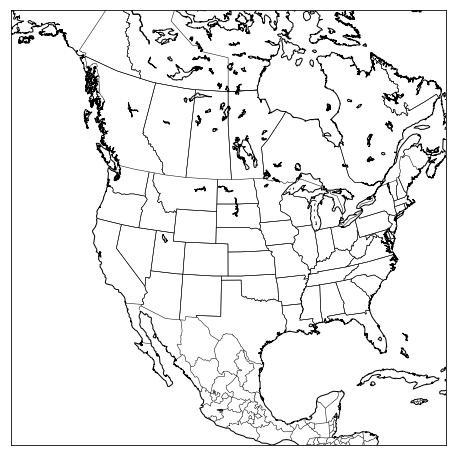

In [80]:
plt.figure(figsize=(15,8))
m.drawcoastlines()
m.drawstates()
m.drawcountries()

In [57]:
x,y = m(lons,lats)

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


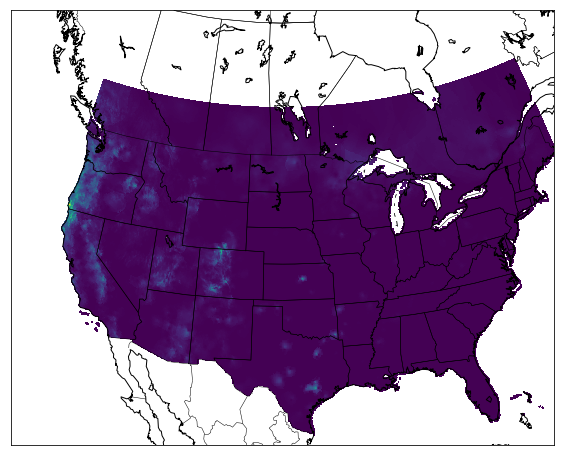

In [58]:
plt.figure(figsize=(15,8))
m.pcolormesh(x,y,ds.variables['Prec'][10,:,:])
m.drawcoastlines()
m.drawstates()
m.drawcountries()

In [74]:
# make a index raster
dat = np.array(ds.variables['Prec'][10,:,:])

In [75]:
n,k = dat.shape
idx = np.arange(1,(n*k)+1)

In [76]:
idx.shape = (n,k)

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


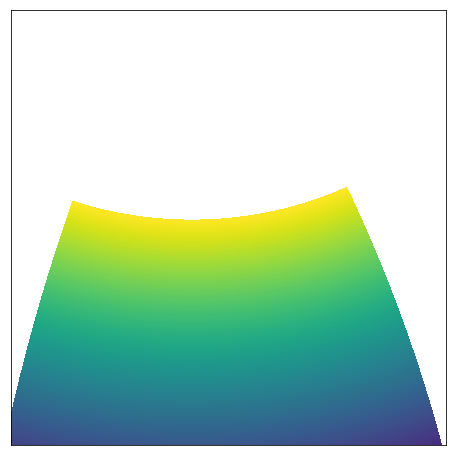

In [81]:
plt.figure(figsize=(15,8))
m.pcolormesh(x,y,idx)

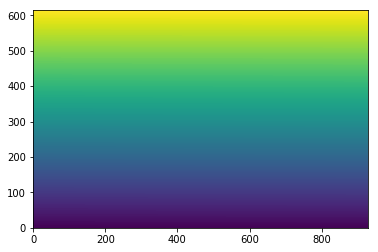

In [82]:
plt.pcolormesh(idx)

## Build a text file with grid intersections and index values

In [90]:
out = pd.DataFrame()
out['lat'] = np.reshape(lats,(n*k))
out['lon'] = np.reshape(lons,(n*k))
out['idx'] = np.reshape(idx,(n*k))

In [94]:
out.to_csv('./data/livneh_idx_grid.csv',index=False,index_label=False) # assume a WGS84 GCS

In [95]:
!ls -ltrh ./data/

total 568M
-rw-r--r-- 1 tbarnhart domainusers 7.6M Mar 15 15:56 nexrad_iv_p_clim_2004_2014.npy
-rw-r--r-- 1 tbarnhart domainusers 7.6M Mar 15 15:56 nexrad_iv_cont_2004-2014.npy
drwxr-xr-x 2 tbarnhart domainusers  64K Mar 15 15:56 raw_stageIV
-rw-r--r-- 1 tbarnhart domainusers 270M Mar 15 16:13 livneh_NAmerExt_1Sep2016.191708.nc
-rw-r--r-- 1 tbarnhart domainusers 270M Mar 21 09:19 livneh_NAmerExt_1Sep2016.201512.nc
-rw-r--r-- 1 tbarnhart domainusers  15M Mar 21 09:52 livneh_idx_grid.csv


In [96]:
out.lon[1] - out.lon[0]

0.0625